In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

cancer = load_breast_cancer()

data = cancer.data
target = cancer.target
feature_names = cancer.feature_names

# 데이터 프레임 생성
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
# 모델 생성 목적을 암을 예측하기 위해서 만들 것이라서 종양을 0으로, 암을 1로 바꿔주기
tumor = df.loc[df['target'] == 1].copy()
cancer = df.loc[df['target'] == 0].copy()
# 종양을 0으로, 암을 1로 설정
tumor['target'] = 0
cancer['target'] = 1

sample = pd.concat([tumor, cancer[:30]], sort=True)

sample['target'].value_counts()

target
0    357
1     30
Name: count, dtype: int64

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    sample.drop("target", axis=1),
    sample['target'],
    random_state=42
)

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

lr_pred = model.predict(X_test)

In [5]:
# 정확도(accuracy) 확인

In [7]:
from sklearn.metrics import accuracy_score
# 모델 예측 정확도 확인
accuracy_score(y_test, lr_pred)

0.9690721649484536

In [8]:
# 잘못된 예측 정확도
# 돌팔이 의사가 모두 종양으로 예측한 경우?

In [12]:
quack_pred = np.zeros(shape=y_test.shape)
accuracy_score(y_test, quack_pred)
# 정확도에 속으면 안된다.
# imbalance 한 dataset 에서 정확도의 신뢰성은 더 떨어진다.

0.9072164948453608

In [13]:
# 오차 행렬 (혼동 행렬, confusion matrix)

In [14]:
from sklearn.metrics import confusion_matrix

# LogisticRegression 모델의 오차행렬
lr_conf_matrix = confusion_matrix(y_test, lr_pred)

# 돌팔이 의사의 오차행렬
quack_conf_matrix = confusion_matrix(y_test, quack_pred)

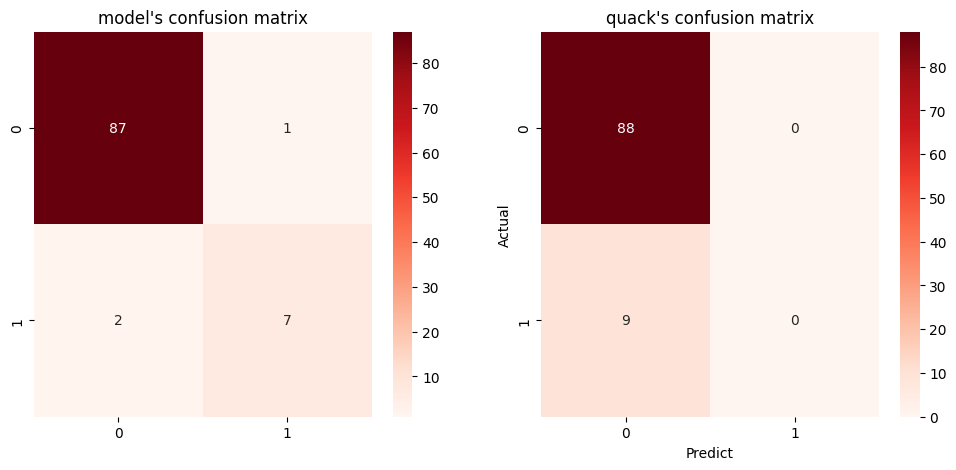

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(121)
ax = sns.heatmap(
    lr_conf_matrix,
    annot=True,
    cmap="Reds"
)
ax.set_title("model's confusion matrix")

plt.subplot(122)
ax = sns.heatmap(
    quack_conf_matrix,
    annot=True,
    cmap="Reds",
)

ax.set_title("quack's confusion matrix")

plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

In [17]:
# 정밀도 : TP / (FP+TP) => 양성으로 예측 시 실제 맞은 비율
# 재현율 : TP / (FN+TP) => 실제 양성인 데이터를 맞힌 비율

In [24]:
from sklearn.metrics import precision_score, recall_score

# 모델의 정밀도와 재현율 확인
precision = precision_score(y_test, lr_pred)
recall = recall_score(y_test, lr_pred)

print(f"Precision : {precision:.3f}")
print(f"Recall : {recall:.3f}")

Precision : 0.875
Recall : 0.778


In [22]:
# 돌팔이의 정밀도와 재현율 확인
precision = precision_score(y_test, quack_pred, zero_division=0)
recall = recall_score(y_test, quack_pred, zero_division=0)

print(f"Precision : {precision:.3f}")
print(f"Recall : {recall:.3f}")
# 정확도가 좋지만, 엉터리였다.

Precision : 0.000
Recall : 0.000


In [25]:
# 정밀도-재현율 trade off

In [26]:
# predict_proba : 각 클래스에 대한 예측 확률
lr_pred_proba = model.predict_proba(X_test)
lr_pred = model.predict(X_test)

In [27]:
lr_pred_proba[:3]

array([[9.99266116e-01, 7.33883728e-04],
       [9.99307105e-01, 6.92894878e-04],
       [9.99999986e-01, 1.39397176e-08]])

In [28]:
lr_pred[:3]

array([0, 0, 0], dtype=int64)

In [29]:
# 기본적인 predict_proba 는 threshold 가 0.5

In [30]:
# binarizer 클래스 사용하기
# 지정한 threshold 보다 작으면 0, 크면 1로 분류해주는 클래스

from sklearn.preprocessing import Binarizer

sample_data = [[0.1, 0.7],
               [1.1, 0.2],
               [0.3, 1.2]]

binarizer = Binarizer(threshold=0.8)
binarizer.fit_transform(sample_data) # binarizer.fit(sample_data).transform(sample_data) 와 같은 효과

array([[0., 0.],
       [1., 0.],
       [0., 1.]])

In [33]:
# 임계값이 0.5(기본)일 때 오차 행렬 확인
lr_pred_proba_1 = model.predict_proba(X_test)[:, 1].reshape(-1, 1) # 1번 class 에 대한 정보가 필요함

binarizer = Binarizer(threshold=0.5)
custom_predict = binarizer.fit_transform(lr_pred_proba_1)
custom_predict

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test, pred, ax=None):
  confusion = confusion_matrix( y_test, pred)
  precision = precision_score(y_test , pred)
  recall = recall_score(y_test , pred)
  accuracy = accuracy_score(y_test, pred)
  hmap_ax = sns.heatmap(
    confusion,
    annot=True,
    cmap="Reds",
    ax=ax
  )
  hmap_ax.set_title('A: {0:.4f}, P: {1:.4f}, R: {2:.4f}'.format(accuracy , precision ,recall))

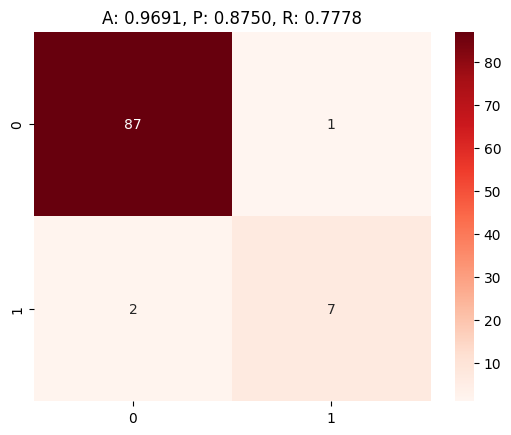

In [35]:
get_clf_eval(y_test, lr_pred)

C:\Users\user\.conda\envs\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


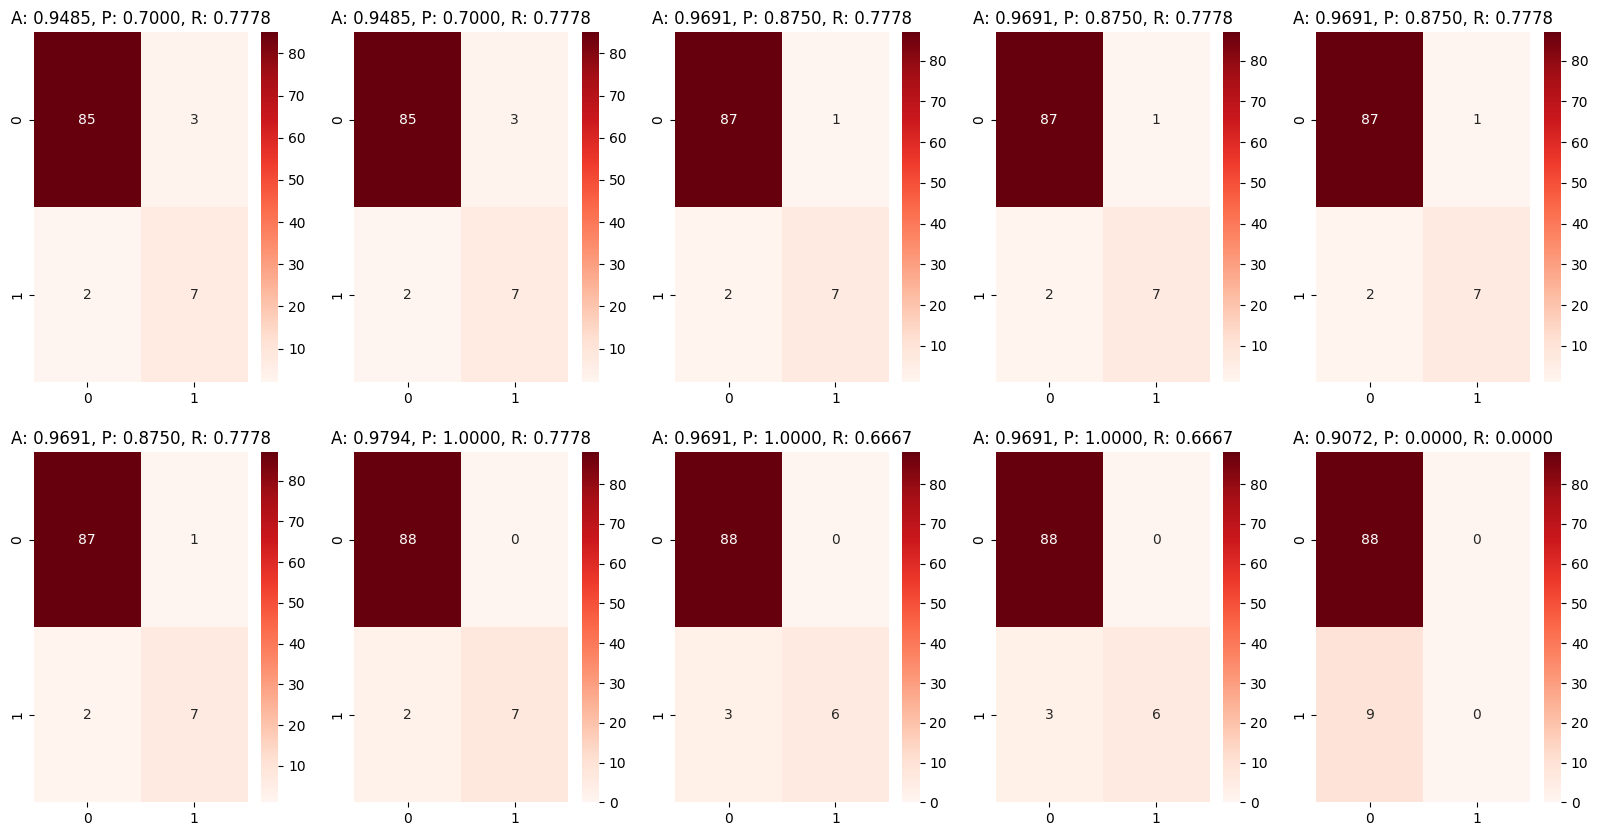

In [36]:
def get_eval_by_threshold(y_test, pred_proba, thresholds):
    fig, axes = plt.subplots(nrows=2, ncols=5)
    fig.set_figwidth(20)
    fig.set_figheight(10)
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold, ax in zip(thresholds, axes.ravel()):
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)

        custom_predict = binarizer.transform(pred_proba)
        get_clf_eval(y_test, custom_predict, ax)
        
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.01, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
get_eval_by_threshold(y_test, lr_pred_proba_1, thresholds )

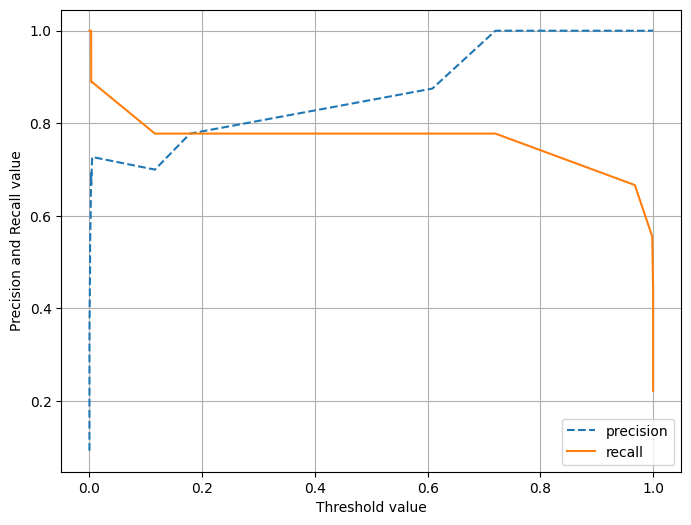

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, model.predict_proba(X_test)[:, 1] )
# threshold 를 늘렸는데 recall 이 줄어들지 않았다 => 모델이 예측을 기대보다 잘 했다.
# 하지만 너무 높이면 위험하기 때문에, 0.2를 적정선으로 두면 안전하다